In [2]:
%matplotlib inline
%autosave 10
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')


Autosaving every 10 seconds


In [32]:
df = pd.read_csv('slim_airplanes_40perc.csv')

In [7]:
df.shape

(265721, 13)

### Number of cancelled occurances per carrier

In [8]:
dfgroup = df.groupby(['UniqueCarrier'])
dfgroup.describe()

ArrDelay    CRSArrTime    CRSDepTime     Cancelled  \
UniqueCarrier                                                                 
AA            count  33201.000000  33735.000000  33735.000000  33735.000000   
              mean       3.340201   1504.049711   1307.305084      0.012628   
              std       43.381979    511.455862    493.070983      0.111664   
              min      -61.000000      1.000000      5.000000      0.000000   
              25%             NaN   1113.000000    859.000000      0.000000   
              50%             NaN   1528.000000   1301.000000      0.000000   
              75%             NaN   1925.000000   1720.000000      0.000000   
              max     1212.000000   2359.000000   2359.000000      1.000000   
AS            count   7764.000000   7821.000000   7821.000000   7821.000000   
              mean      -0.761978   1516.420407   1330.389592      0.004219   
              std       29.457839    552.855218    517.380693      0.064824   
              min      -67.000000      1.000000      5.000000      0.000000   
              25%             NaN   1059.000000    900.000000      0.000000   
              50%             NaN   1604.000000   1310.000000      0.000000   
              75%             NaN   2019.000000   1755.000000      0.000000   
              max      754.000000   2359.000000   2355.000000      1.000000   
B6            count  11961.000000  12203.000000  12203.000000  12203.000000   
              mean       6.716579   1474.825944   1364.883553      0.017455   
              std       41.219053    559.629598    509.748092      0.130964   
              min      -62.000000      1.000000     40.000000      0.000000   
              25%             NaN   1037.000000    920.000000      0.000000   
              50%             NaN   1504.000000   1345.000000      0.000000   
              75%             NaN   1946.000000   1823.000000      0.000000   
              max      507.000000   2359.000000   2359.000000      1.000000   
DL            count  40119.000000  40373.000000  40373.000000  40373.000000   
              mean       0.149929   1508.138855   1327.397097      0.004384   
              std       38.953213    491.134254    484.090290      0.066068   
              min      -67.000000      1.000000      5.000000      0.000000   
              25%             NaN   1117.000000    915.000000      0.000000   
              50%             NaN   1528.000000   1318.000000      0.000000   
...                           ...           ...           ...           ...   
UA            std       45.067070    539.522099    494.809110      0.113863   
              min      -64.000000      1.000000      1.000000      0.000000   
              25%             NaN   1102.000000    900.000000      0.000000   
              50%             NaN   1532.000000   1304.000000      0.000000   
              75%             NaN   1935.000000   1732.000000      0.000000   
              max     1036.000000   2359.000000   2359.000000      1.000000   
US            count   8043.000000   8243.000000   8243.000000   8243.000000   
              mean       3.939948   1504.434065   1331.804076      0.021837   
              std       31.763833    505.447447    496.961403      0.146159   
              min      -56.000000      2.000000      5.000000      0.000000   
              25%             NaN   1105.000000    920.000000      0.000000   
              50%             NaN   1529.000000   1330.000000      0.000000   
              75%             NaN   1920.000000   1745.000000      0.000000   
              max      515.000000   2359.000000   2359.000000      1.000000   
VX            count   2874.000000   2909.000000   2909.000000   2909.000000   
              mean       3.922060   1586.335510   1354.874871      0.008594   
              std       33.843143    473.343222    469.594168      0.092321   
              min      -63.000000     40.000000     10.000000      0.000000

In [9]:
for name, group in dfgroup:
    print('For carrier', name)
    cancelled = len(group[group['Cancelled'] == 1])
    total = len(group)
    ratio = cancelled / total
    print('Number of cancelled flights:', cancelled, '\nNumber of total flights:', total,
         'Ratio:', ratio)

For carrier AA
Number of cancelled flights: 426 
Number of total flights: 33735 Ratio: 0.012627834593152512
For carrier AS
Number of cancelled flights: 33 
Number of total flights: 7821 Ratio: 0.004219409282700422
For carrier B6
Number of cancelled flights: 213 
Number of total flights: 12203 Ratio: 0.017454724248135704
For carrier DL
Number of cancelled flights: 177 
Number of total flights: 40373 Ratio: 0.004384118098729349
For carrier EV
Number of cancelled flights: 637 
Number of total flights: 25915 Ratio: 0.024580358865521897
For carrier F9
Number of cancelled flights: 23 
Number of total flights: 4195 Ratio: 0.0054827175208581646
For carrier HA
Number of cancelled flights: 6 
Number of total flights: 3500 Ratio: 0.0017142857142857142
For carrier MQ
Number of cancelled flights: 605 
Number of total flights: 13223 Ratio: 0.04575361113211828
For carrier NK
Number of cancelled flights: 101 
Number of total flights: 5505 Ratio: 0.01834695731153497
For carrier OO
Number of cancelled f

### Carriers with cancel percentage higher than 3%

In [10]:
for name, group in dfgroup:
    cancelled = len(group[group['Cancelled'] == 1])
    total = len(group)
    ratio = cancelled / total
    if (ratio > 0.03):
        print('Carrier', name, 'has ratio', ratio);

Carrier MQ has ratio 0.04575361113211828


### Plotting ratios

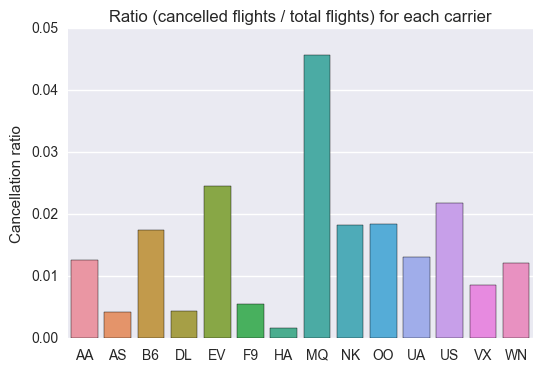

In [11]:
x = []
xstrings = []
y = []
for name, group in dfgroup:
    cancelled = len(group[group['Cancelled'] == 1])
    total = len(group)
    ratio = cancelled / total
    x.append(len(x))
    xstrings.append(name)
    y.append(ratio)
    
# plt.plot(x, y, 'bs')

sns.barplot(x=x, y=y)
# plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(x, xstrings)
plt.ylabel('Cancellation ratio')
plt.title('Ratio (cancelled flights / total flights) for each carrier')
plt.savefig('graph/ratio_cancelled_total.png', bbox_inches='tight')
# plt.show()

### Number of cancellations for each flight number

### Correlation between distance traveled and cancellations

In [13]:
newdf = df.copy(deep=True)
newdf.loc[newdf['Cancelled'] == 0, 'Cancelled'] = 'No'
newdf.loc[newdf['Cancelled'] == 1, 'Cancelled'] = 'Yes'

In [14]:
len(df[df['Cancelled'] == 1])

3933

In [15]:
len(df[df['Cancelled'] == 0])

261788

In [16]:
df.shape

(265721, 13)

In [17]:
df['random'] = pd.Series(np.random.randn(len(df)), index=df.index)

In [ ]:
sns.heatmap([df.y, df.x], annot=True, fmt="d")
plt.savefig('graph/heatmap.png', bbox_inches='tight')

In [44]:
df.columns.values

array(['Quarter', 'Month', 'UniqueCarrier', 'FlightNum', 'OriginAirportID',
       'DestAirportID', 'CRSDepTime', 'DepDelay', 'CRSArrTime', 'ArrDelay',
       'Cancelled', 'CancellationCode', 'Distance', 'random'], dtype=object)

In [18]:
dfcan = df[df['Cancelled'] == 1]

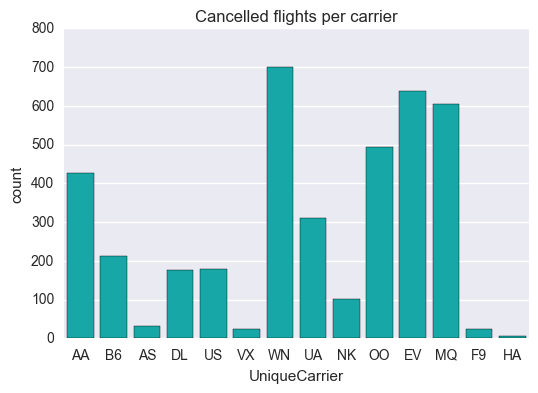

In [19]:
sns.countplot(x="UniqueCarrier", data=dfcan, color="c");
plt.title('Cancelled flights per carrier')
plt.savefig('graph/cancelled_carrier.png', bbox_inches='tight')

In [47]:
df.columns.values

array(['Quarter', 'Month', 'UniqueCarrier', 'FlightNum', 'OriginAirportID',
       'DestAirportID', 'CRSDepTime', 'DepDelay', 'CRSArrTime', 'ArrDelay',
       'Cancelled', 'CancellationCode', 'Distance'], dtype=object)

In [53]:
temp_df = pd.DataFrame({'UniqueCarrier': df.UniqueCarrier.unique(), 'CarrierID':range(len(df.UniqueCarrier.unique()))})
dfnum = df.merge(temp_df, on='UniqueCarrier', how='left')

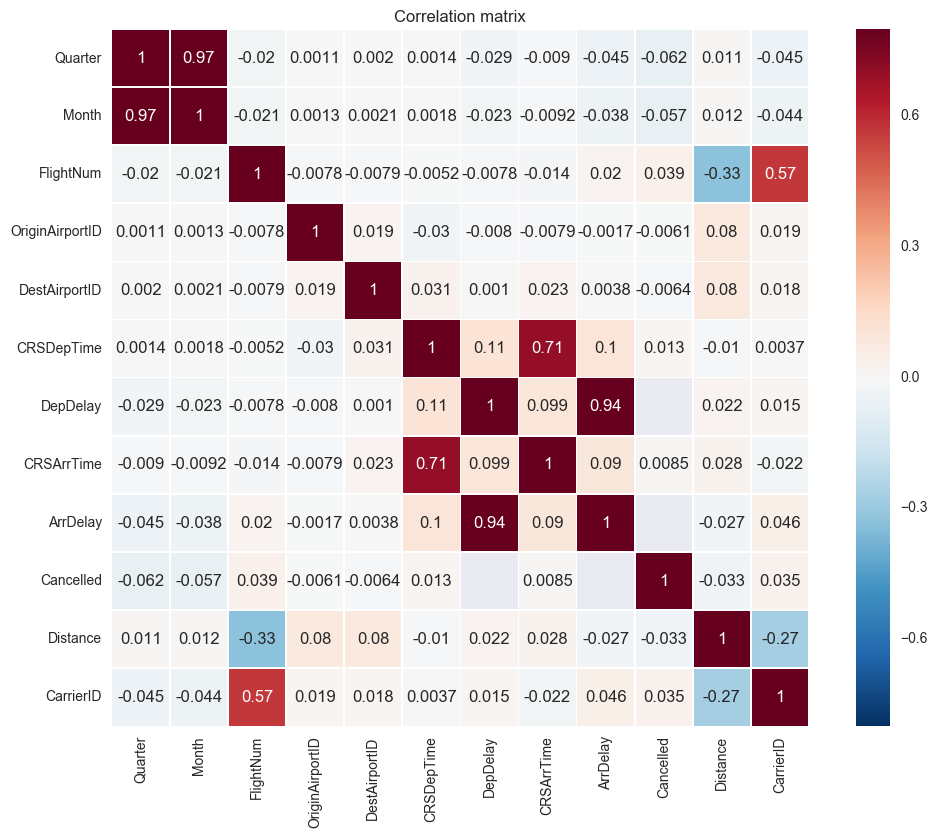

In [54]:
sns.set(font_scale=1)
corrmat = dfnum.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, linewidths=.5)
plt.title('Correlation matrix')
plt.savefig('graph/corrmat.png', bbox_inches='tight')

In [21]:
cols = ['Quarter', 'Month', 'UniqueCarrier', 'FlightNum', 'OriginAirportID', 'DestAirportID', 'Distance', 'Cancelled']

In [34]:
flights = df.groupby(['OriginAirportID', 'DestAirportID']).aggregate(np.mean).reset_index()
flights = flights[['OriginAirportID', 'DestAirportID', 'Distance']]

In [35]:

ff = flights.pivot(index="OriginAirportID", columns="DestAirportID", values="Distance")

In [36]:
ff.head()

DestAirportID,10135,10136,10140,10141,10146,10154,10155,10157,10158,10165,...,15412,15497,15582,15607,15624,15841,15897,15919,15991,16218
OriginAirportID,,,,,,,,,,,,,,,,,,,,,
10135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
origincnt = df['OriginAirportID'].value_counts()

In [26]:
origincnt.count()

322

In [129]:
ffa = ff[ff.columns[35:50]]

In [130]:
ff.columns.shape

(312,)

In [162]:
import math

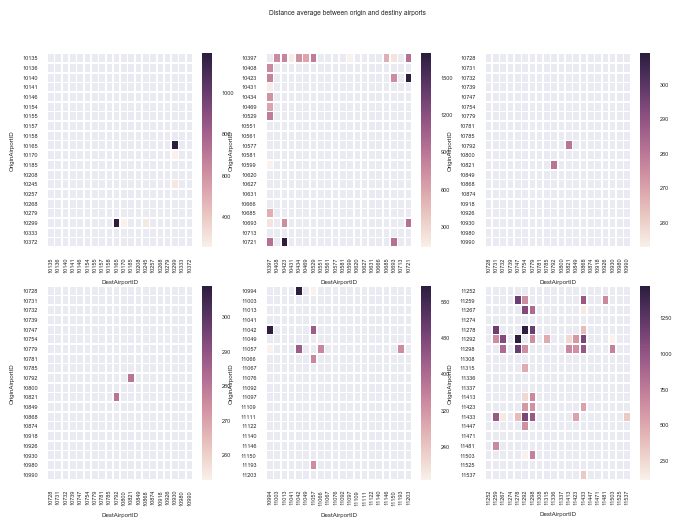

In [46]:
sns.set(font_scale=0.4)
# plt.figure(figsize=(26, 26))
fig, axs = plt.subplots(nrows=2, ncols=3)    

plt.suptitle('Distance average between origin and destiny airports')
for i in range(2):
    for j in range(3):
        start = i * 2 * 20 + j * 20
        sns.heatmap(ff[ff.columns[start:start+20]][start:start+20], linewidths=.5, fmt='.0f', annot_kws={"size":3}, ax=axs[i][j])
plt.savefig('graph/distance_orig_dest.png', bbox_inches='tight')

In [78]:
ff.head()

DestAirportID,10135,10136,10140,10141,10146,10154,10155,10157,10158,10170,...,15411,15412,15582,15607,15624,15841,15897,15919,15991,16218
OriginAirportID,,,,,,,,,,,,,,,,,,,,,
10135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
flights

,OriginAirportID,DestAirportID,Distance
0,10135,10397,692.000000
1,10135,11433,425.000000
2,10135,13930,654.400000
3,10136,11298,158.000000
4,10140,10397,1269.000000
5,10140,10821,1670.000000
6,10140,11259,580.000000
7,10140,11292,349.000000
8,10140,11298,569.000000
9,10140,12191,759.000000


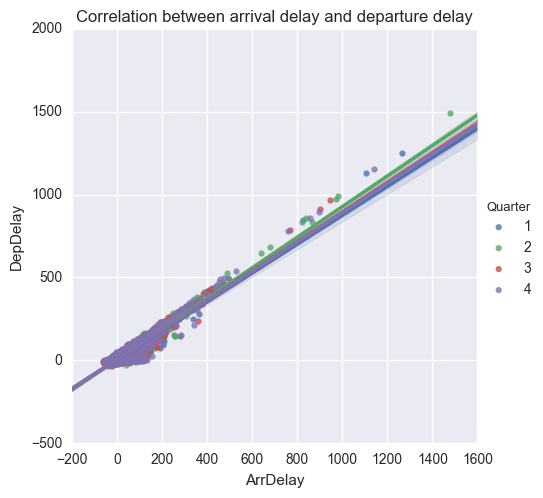

In [42]:
sns.lmplot(x="ArrDelay", y="DepDelay", hue='Quarter', data=df);
plt.title('Correlation between arrival delay and departure delay')
plt.savefig('graph/arrdelay_depdelay.png', bbox_inches='tight')

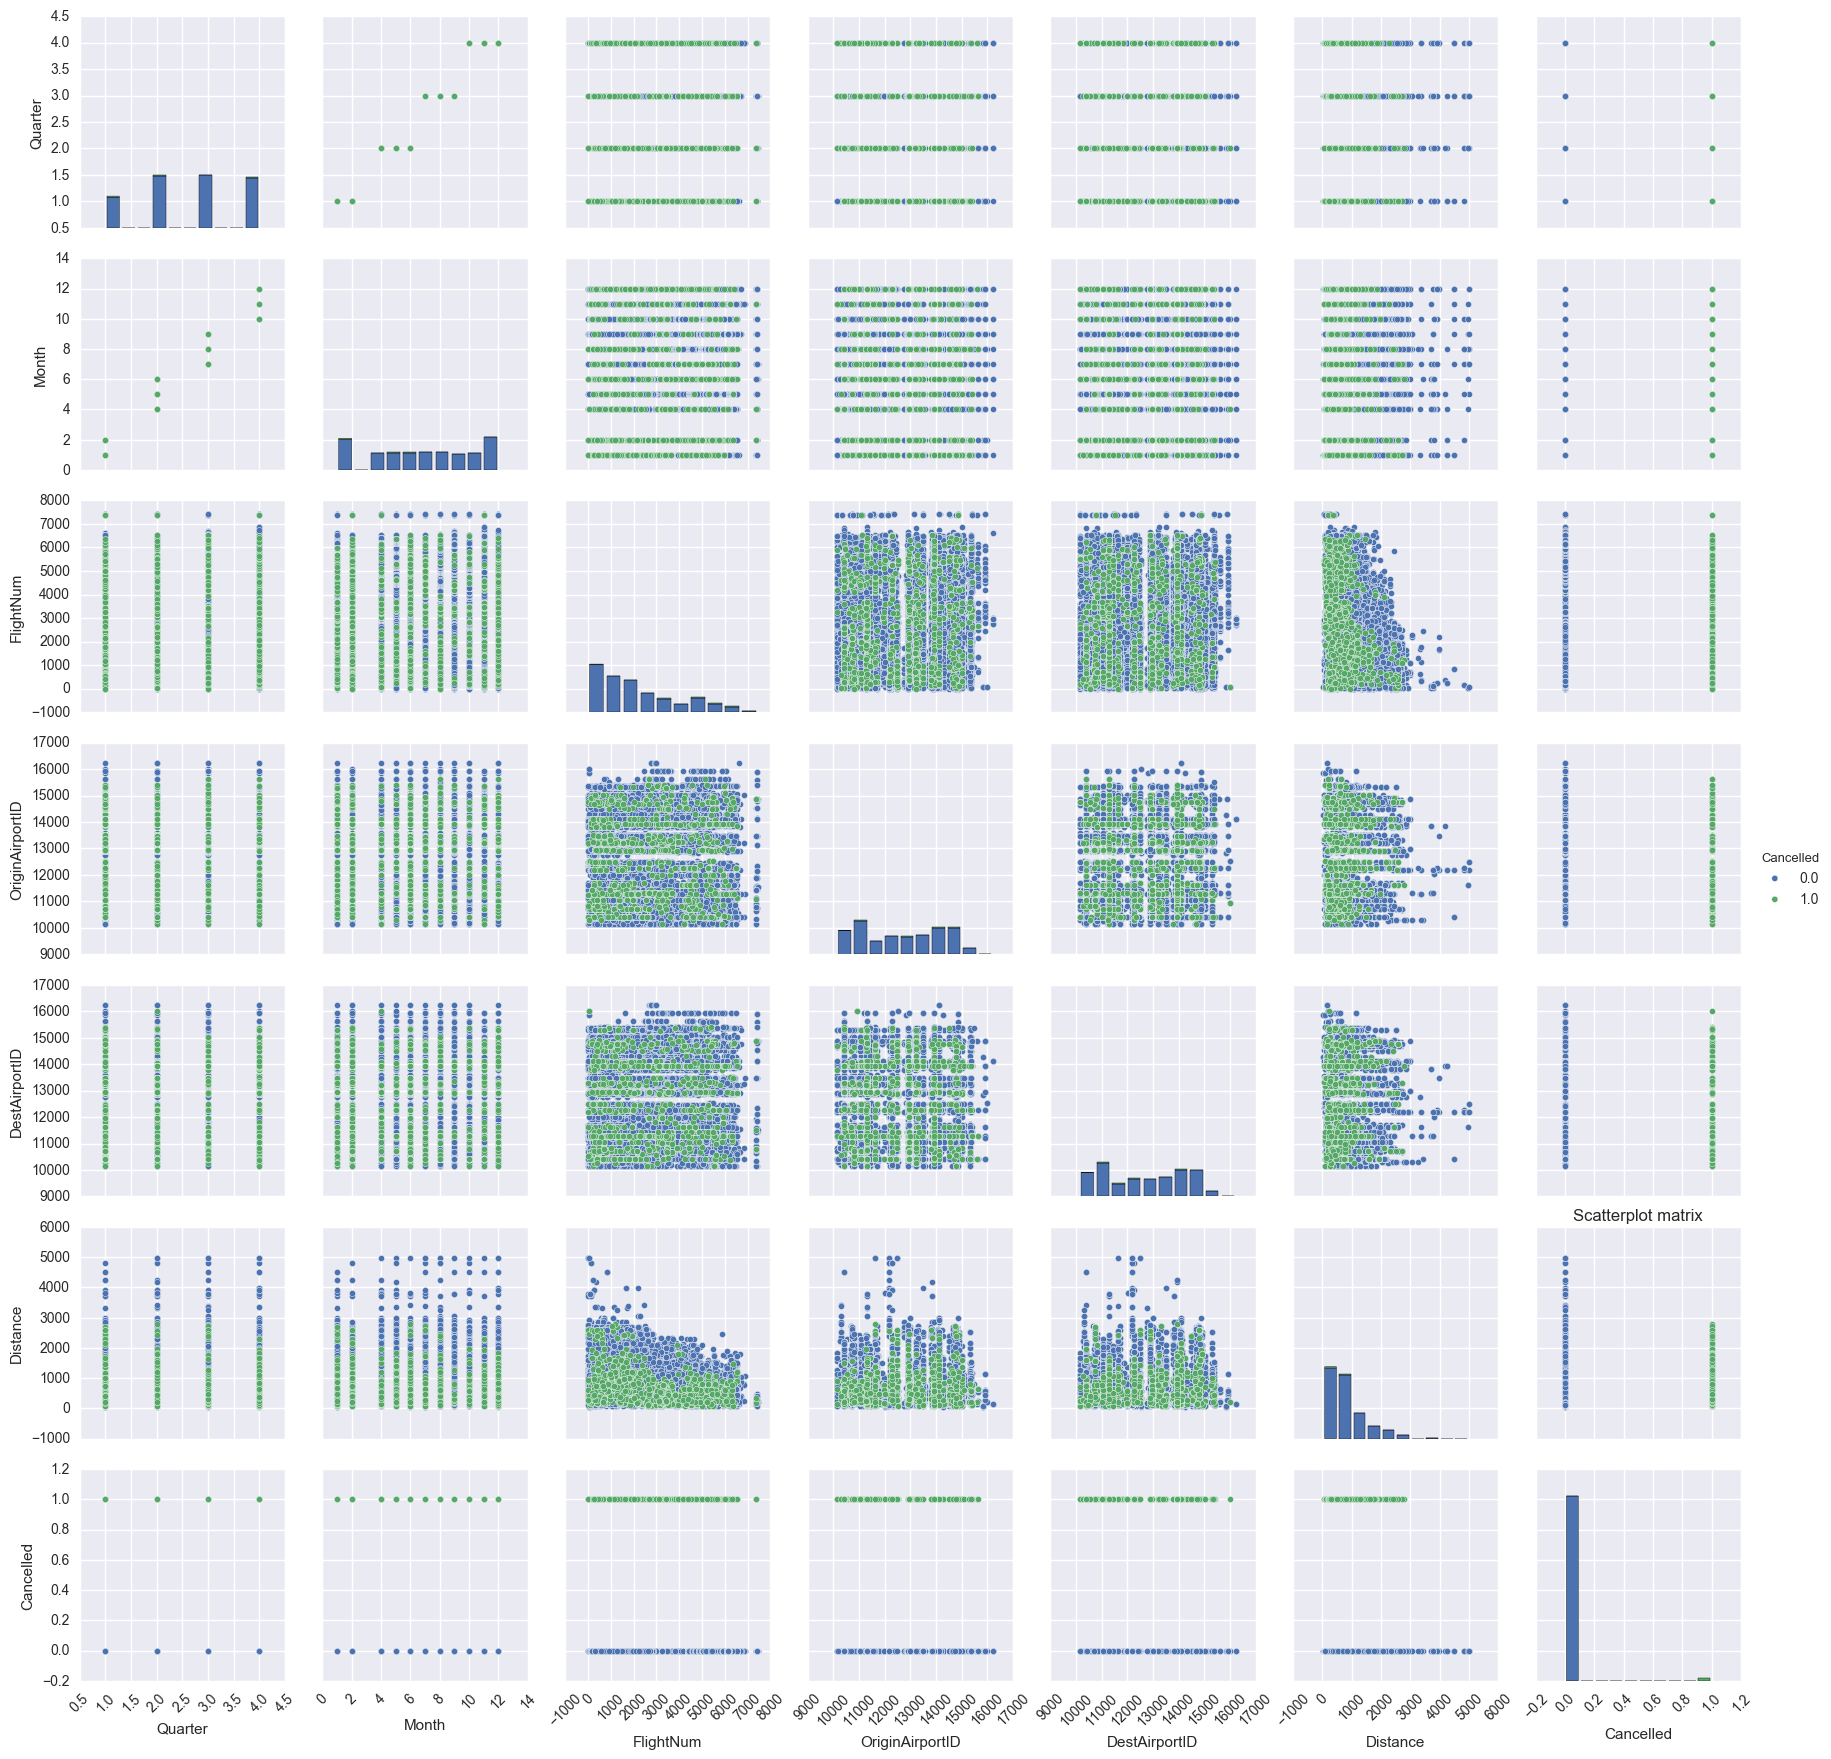

In [31]:
g = sns.pairplot(df[cols], hue="Cancelled", diag_kind="hist")  
for ax in g.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Scatterplot matrix')
plt.savefig('graph/scatplotmat.png', bbox_inches='tight')

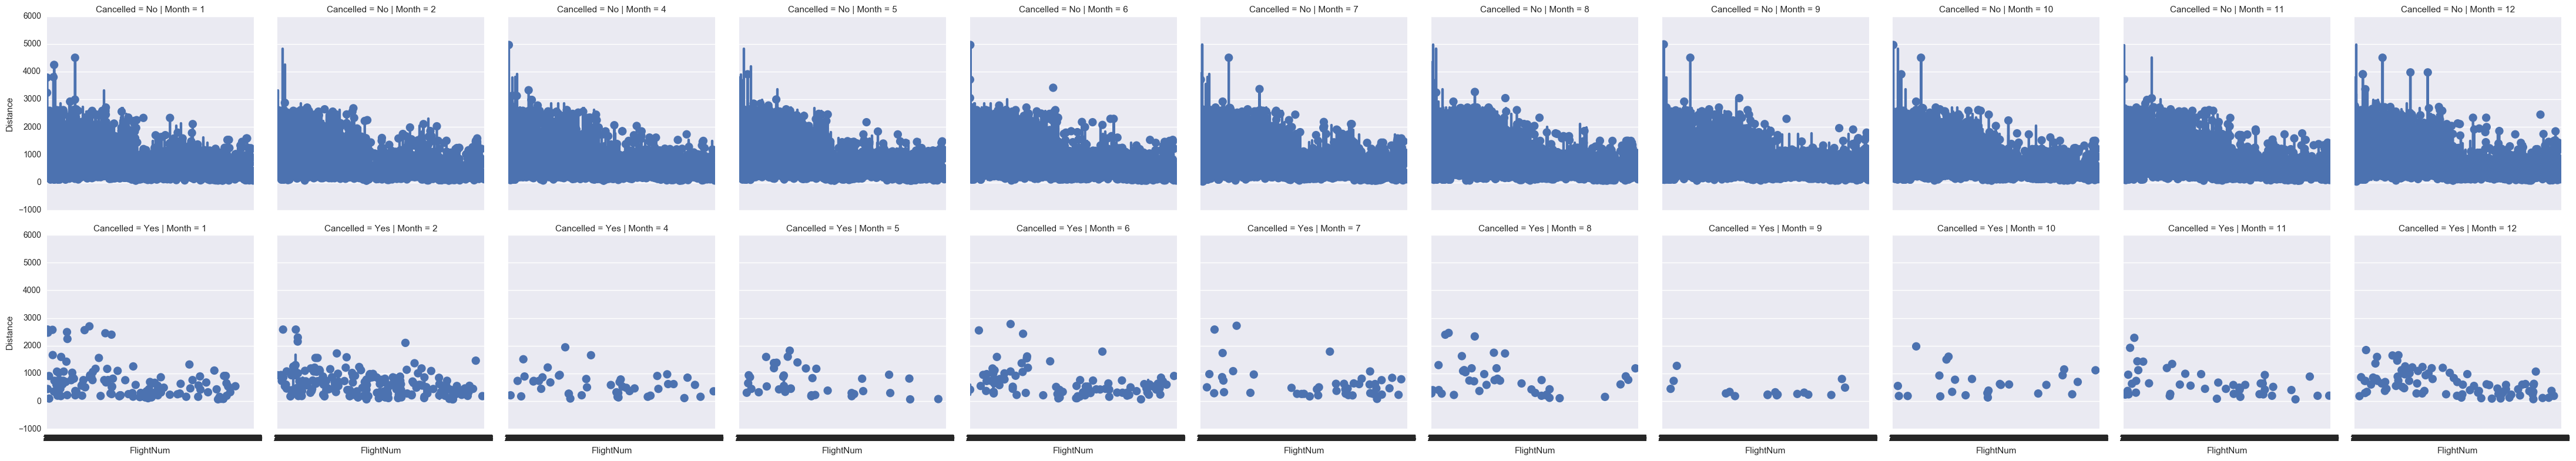

In [17]:
g = sns.factorplot(x='FlightNum', y='Distance', row='Cancelled', col='Month', data=newdf)
# g = (g.map(plt.scatter, 'Month', 'Distance').add_legend())
plt.savefig('graph/months_distance_cancelled.png', bbox_inches='tight')

ValueError: max must be larger than min in range parameter.

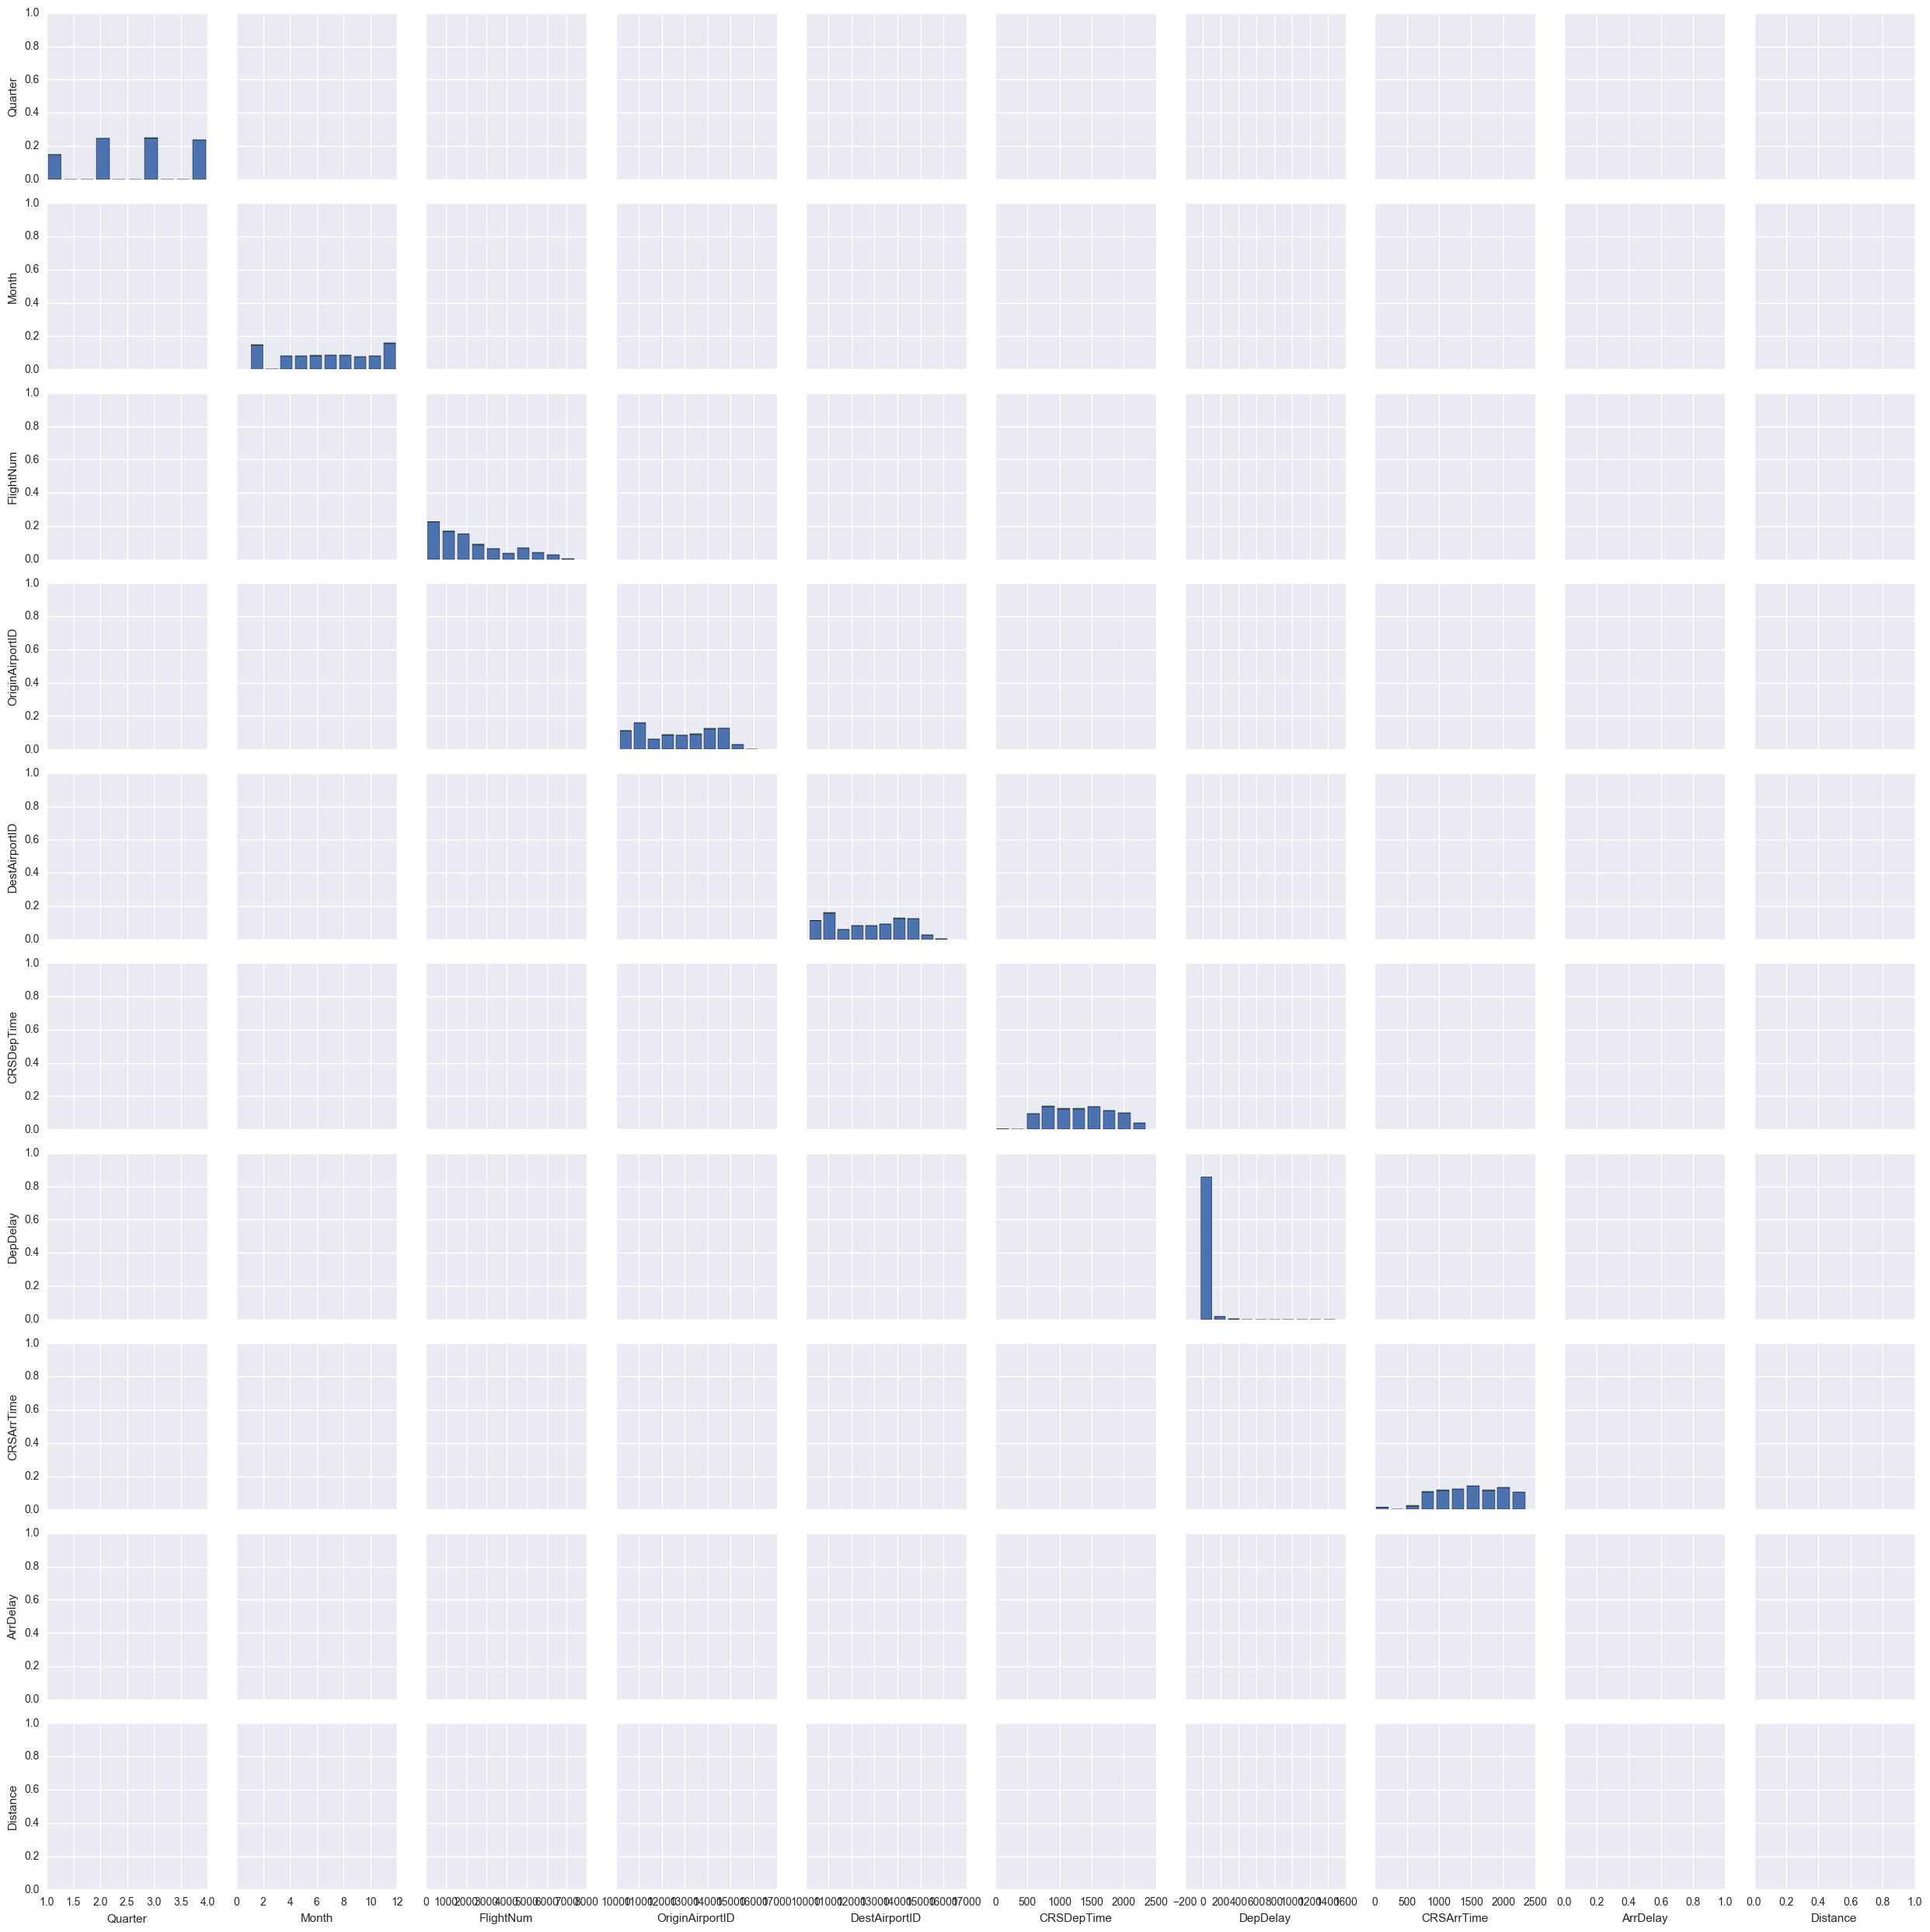

In [19]:
sns.pairplot(newdf, hue='Cancelled', dropna=True)
plt.savefig('graph/scatterplot_matrix.png', bbox_inches='tight')

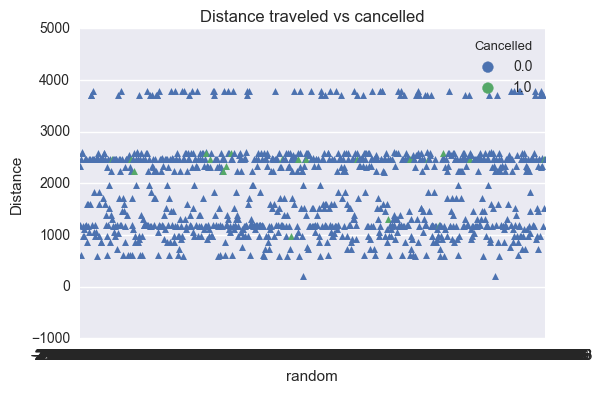

In [45]:
sns.stripplot(x='random', y='Distance', hue='Cancelled', marker='^', jitter=0.3, data=df.head(1000))
plt.title('Distance traveled vs cancelled')
plt.savefig('graph/ratio_cancelled_distance.png', bbox_inches='tight')

In [ ]:
cancel = df[df['Cancelled'] == 1]
cancel = cancel.ix[:, 'Cancelled']
color = ['red', 'blue']
plt.scatter(df['Distance'], df['Cancelled'] )

### Delay vs cancellation

In [ ]:
sns.swarmplot(x="Cancelled", y="DepDelay", data=df, linewidth=1)
plt.title('Delay vs cancellation')
plt.savefig('graph/ratio_cancelled_depdelay.png', bbox_inches='tight')

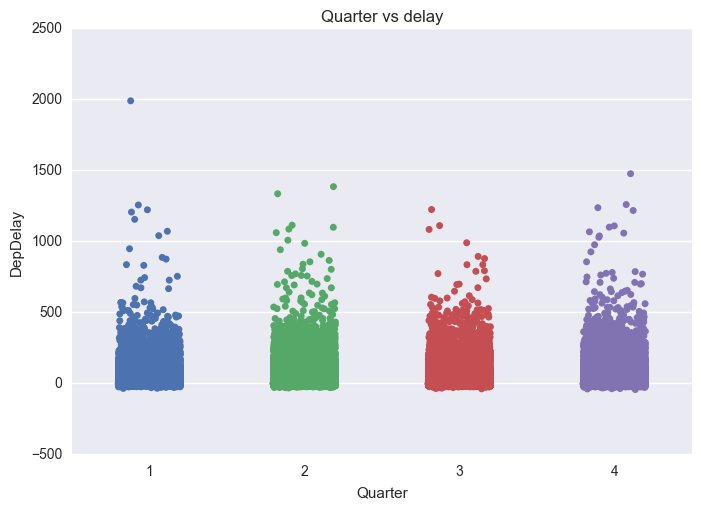

In [28]:
sns.stripplot(x="Quarter", y="DepDelay", data=df, jitter=0.2)
plt.title('Quarter vs delay')
plt.savefig('graph/quarter_vs_delay.png', bbox_inches='tight')

In [ ]:
sns.stripplot(x="Quarter", data=df, jitter=0.2, hue='Quarter')
plt.title('Quarter vs cancelled')
plt.savefig('graph/quarter_vs_cancelled.png', bbox_inches='tight')

In [ ]:
sns.stripplot(x="FlightNum", y="DepDelay", data=df)
plt.title('Flight number vs delay')
plt.savefig('graph/flight_depdelay.png', bbox_inches='tight')

In [ ]:
df[df['Cancelled'] == 1]